In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [5]:
data= pd.read_csv("HR Analytics Project.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
data.shape

(1470, 35)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
data.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [11]:
data.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [12]:
data.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [14]:
data.drop(columns = ['EmployeeCount','EmployeeNumber','Over18','StandardHours'], inplace=True)

In [15]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [16]:
num_cols = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate',
            'PercentSalaryHike','TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion','YearsWithCurrManager']


cat_cols = ['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
            'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
            'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear',
            'WorkLifeBalance']

In [18]:
(abs((data[num_cols].describe().T['mean'] -
      data[num_cols].describe().T['50%'])*
     100/data[num_cols].describe().T['mean'])).sort_values()

DailyRate                   0.060526
HourlyRate                  0.165187
MonthlyRate                 0.542184
Age                         2.501934
PercentSalaryHike           7.952411
TotalWorkingYears          11.344310
DistanceFromHome           23.851106
MonthlyIncome              24.357189
YearsWithCurrManager       27.239729
YearsAtCompany             28.654630
YearsInCurrentRole         29.065466
YearsSinceLastPromotion    54.291045
dtype: float64

In [19]:
((data[num_cols].describe().T['max'] -
  data[num_cols].describe().T['75%'])*
 100/data[num_cols].describe().T['max']).sort_values()

HourlyRate                 16.250000
DailyRate                  22.815210
MonthlyRate                24.213860
PercentSalaryHike          28.000000
Age                        28.333333
DistanceFromHome           51.724138
MonthlyIncome              58.102905
YearsWithCurrManager       58.823529
YearsInCurrentRole         61.111111
TotalWorkingYears          62.500000
YearsAtCompany             77.500000
YearsSinceLastPromotion    80.000000
dtype: float64

In [20]:
data.duplicated().sum()

0

No duplicate value found

In [21]:
data.isnull().sum().sum()

0

No null value found

In [22]:
data[data == 0.0].count()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          197
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtCompany               44
YearsInCurrentRole          244
YearsSinceLastPromotion     581
YearsWithCurrManager        263
dtype: i

In [23]:
data[num_cols].dtypes

Age                        int64
DailyRate                  int64
DistanceFromHome           int64
HourlyRate                 int64
MonthlyIncome              int64
MonthlyRate                int64
PercentSalaryHike          int64
TotalWorkingYears          int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
dtype: object

In [24]:
data[cat_cols].dtypes

Attrition                   object
BusinessTravel              object
Department                  object
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
NumCompaniesWorked           int64
OverTime                    object
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
dtype: object

In [25]:
datam =data.copy()

In [26]:
datam

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [28]:
datam_num = datam[num_cols]
datam_cat = datam[cat_cols]
print(len(num_cols))
print(len(cat_cols))

12
19


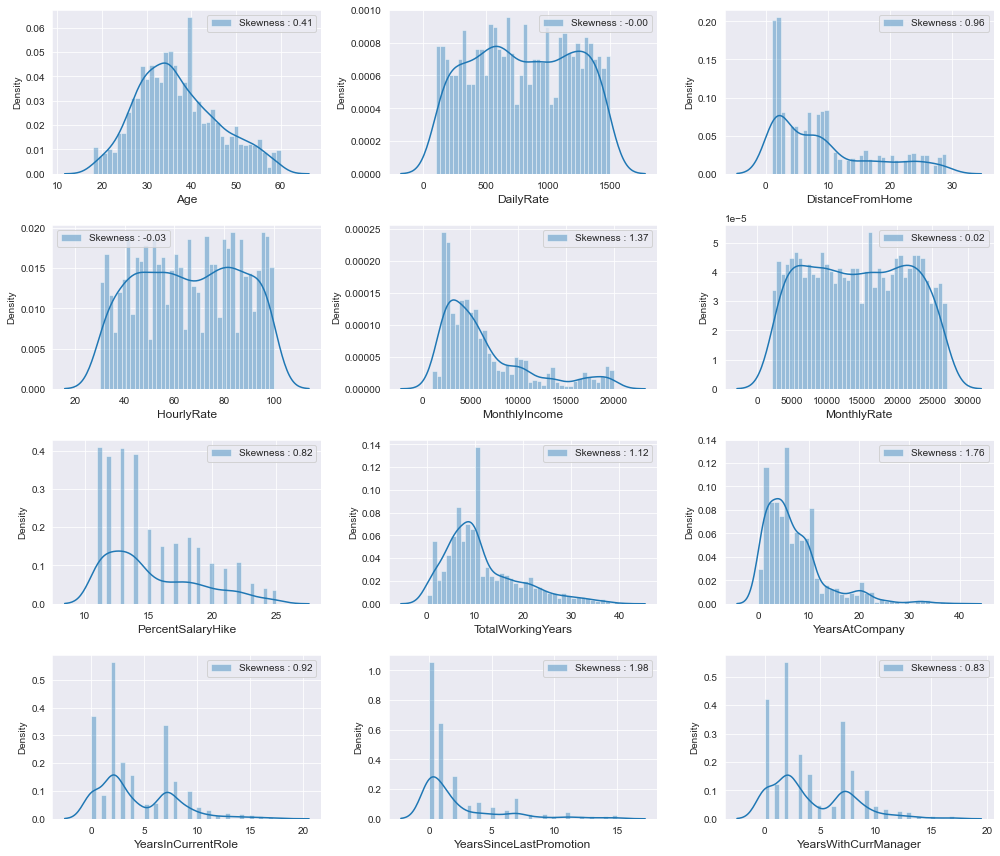

In [29]:
i=0
plt.figure(figsize=(14,12))
for column in datam_num.columns:
    plt.subplot(4,3,i+1)
    sns.distplot(datam_num[column], bins=40, label="Skewness : %.2f"%(datam_num[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

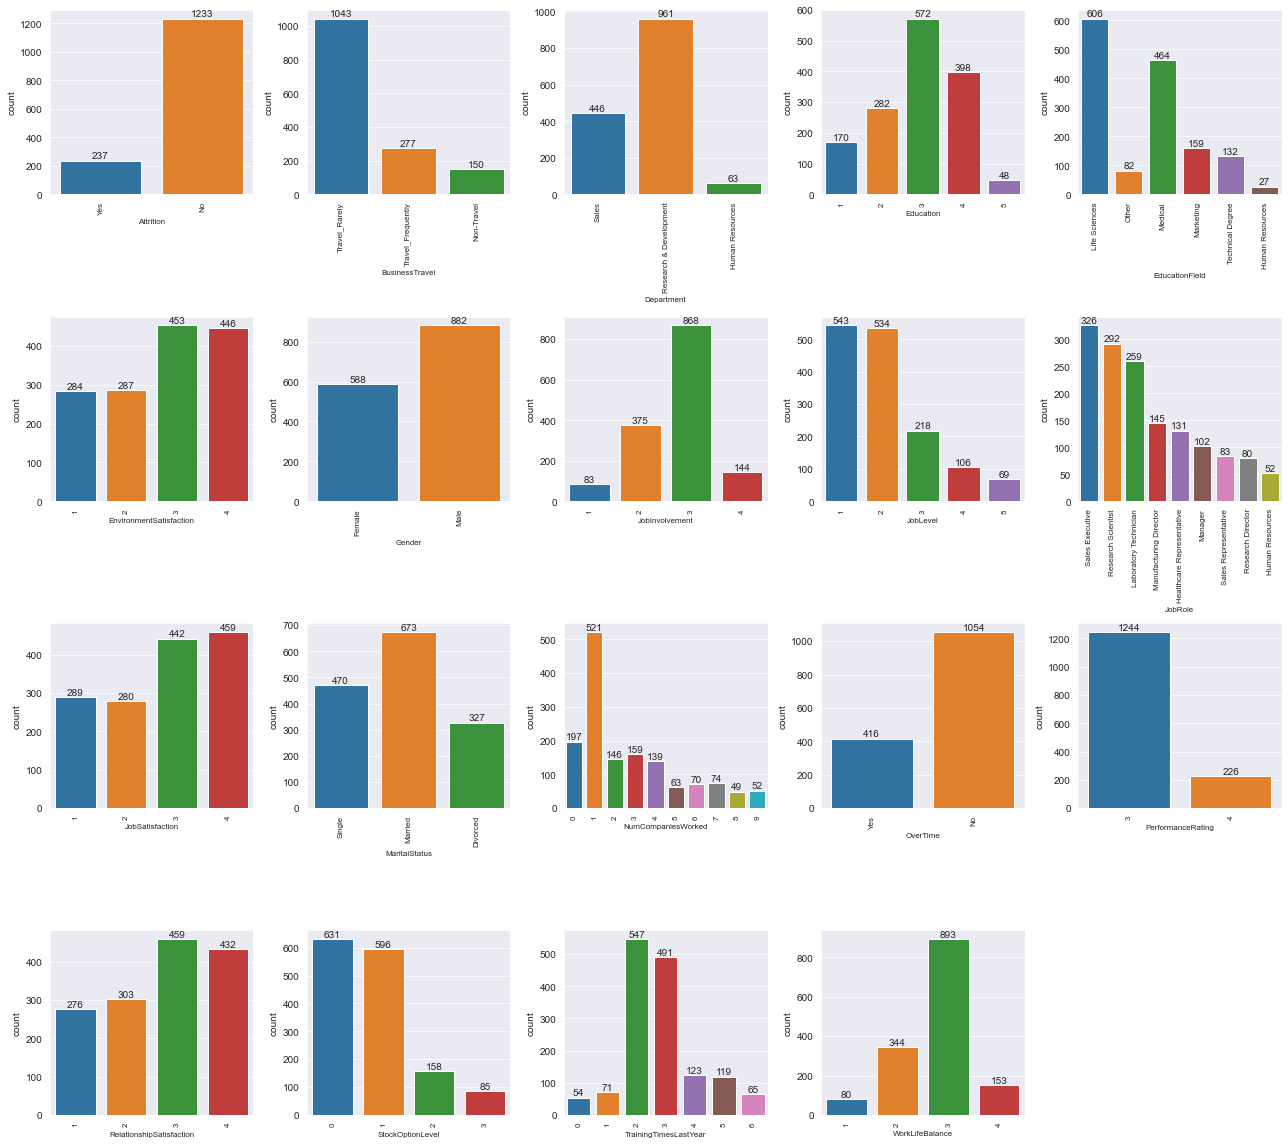

In [31]:
#distribution of numerical features using countplot
i=0
plt.figure(figsize=(18,16))
for column in datam_cat.columns:
    plt.subplot(4,5,i+1)

    ax = sns.countplot(x= datam_cat[column])
    ax.bar_label(ax.containers[0]);
    plt.xticks(fontsize = 8, rotation=90)
    plt.xlabel(column,fontsize=8)
    i+=1
    
plt.tight_layout()

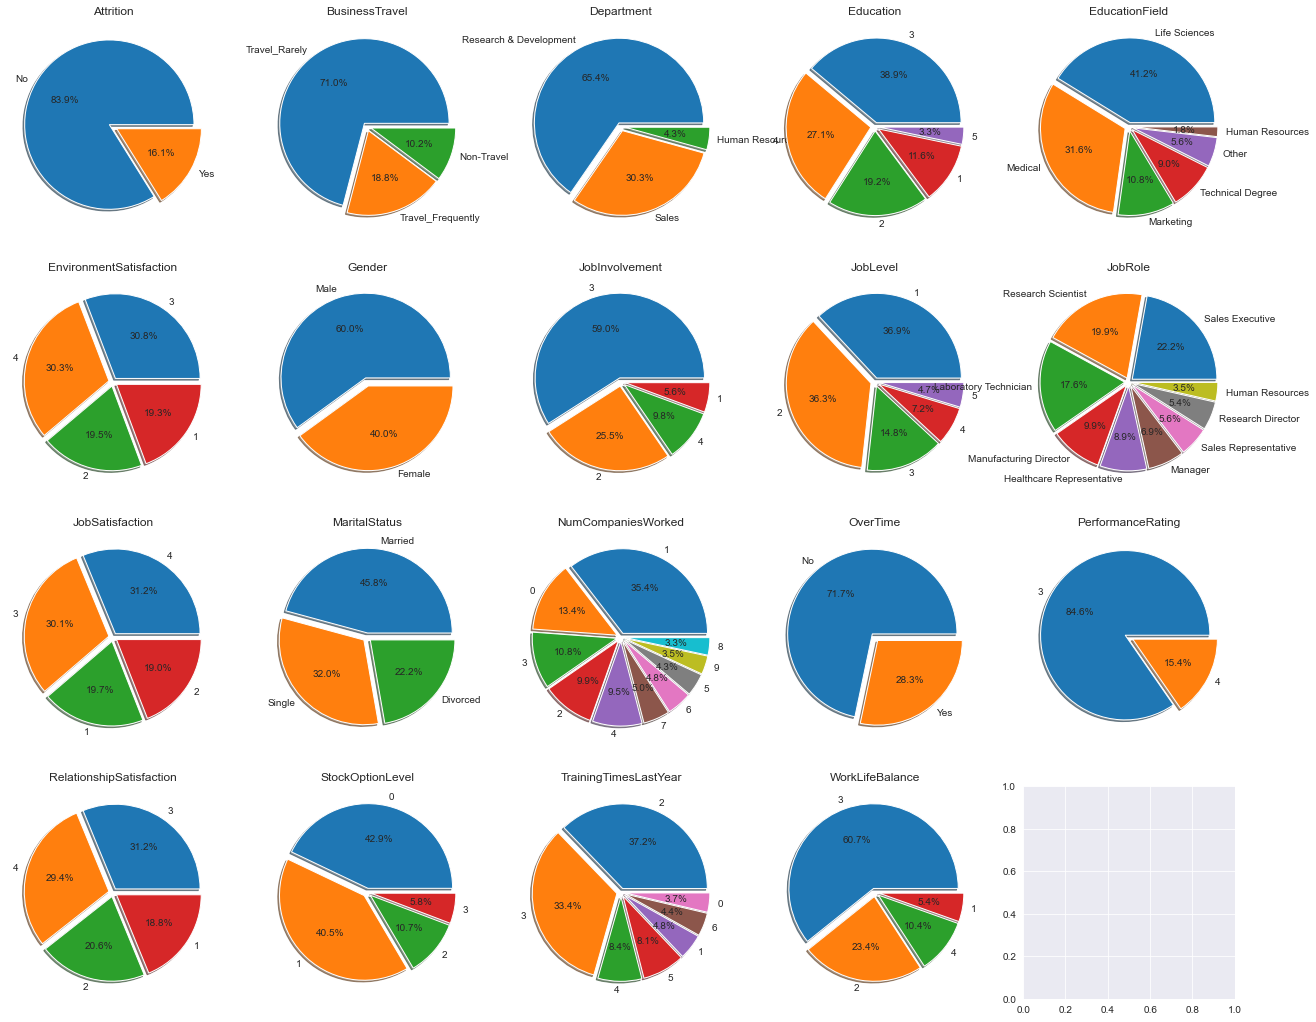

In [33]:
# Percentage distribution of values in each categories using pie plot
r, c = 4,5
fig, axs = plt.subplots(r,c, figsize=(22,18))
k=0
for i in range(0, r, 1):
    for j in range(0, c, 1):
        if k <len(cat_cols):
            x = datam_cat[cat_cols[k]].value_counts()
            l = [0.05 for item in range(len(x))]
            axs[i, j].pie(x, autopct='%1.1f%%', labels =list(datam_cat[cat_cols[k]].value_counts().index), shadow=True,explode=l);
#             plt.title(label=cat_cols[k],loc="left",fontstyle='italic')
            axs[i, j].set_title(cat_cols[k])
            k+=1

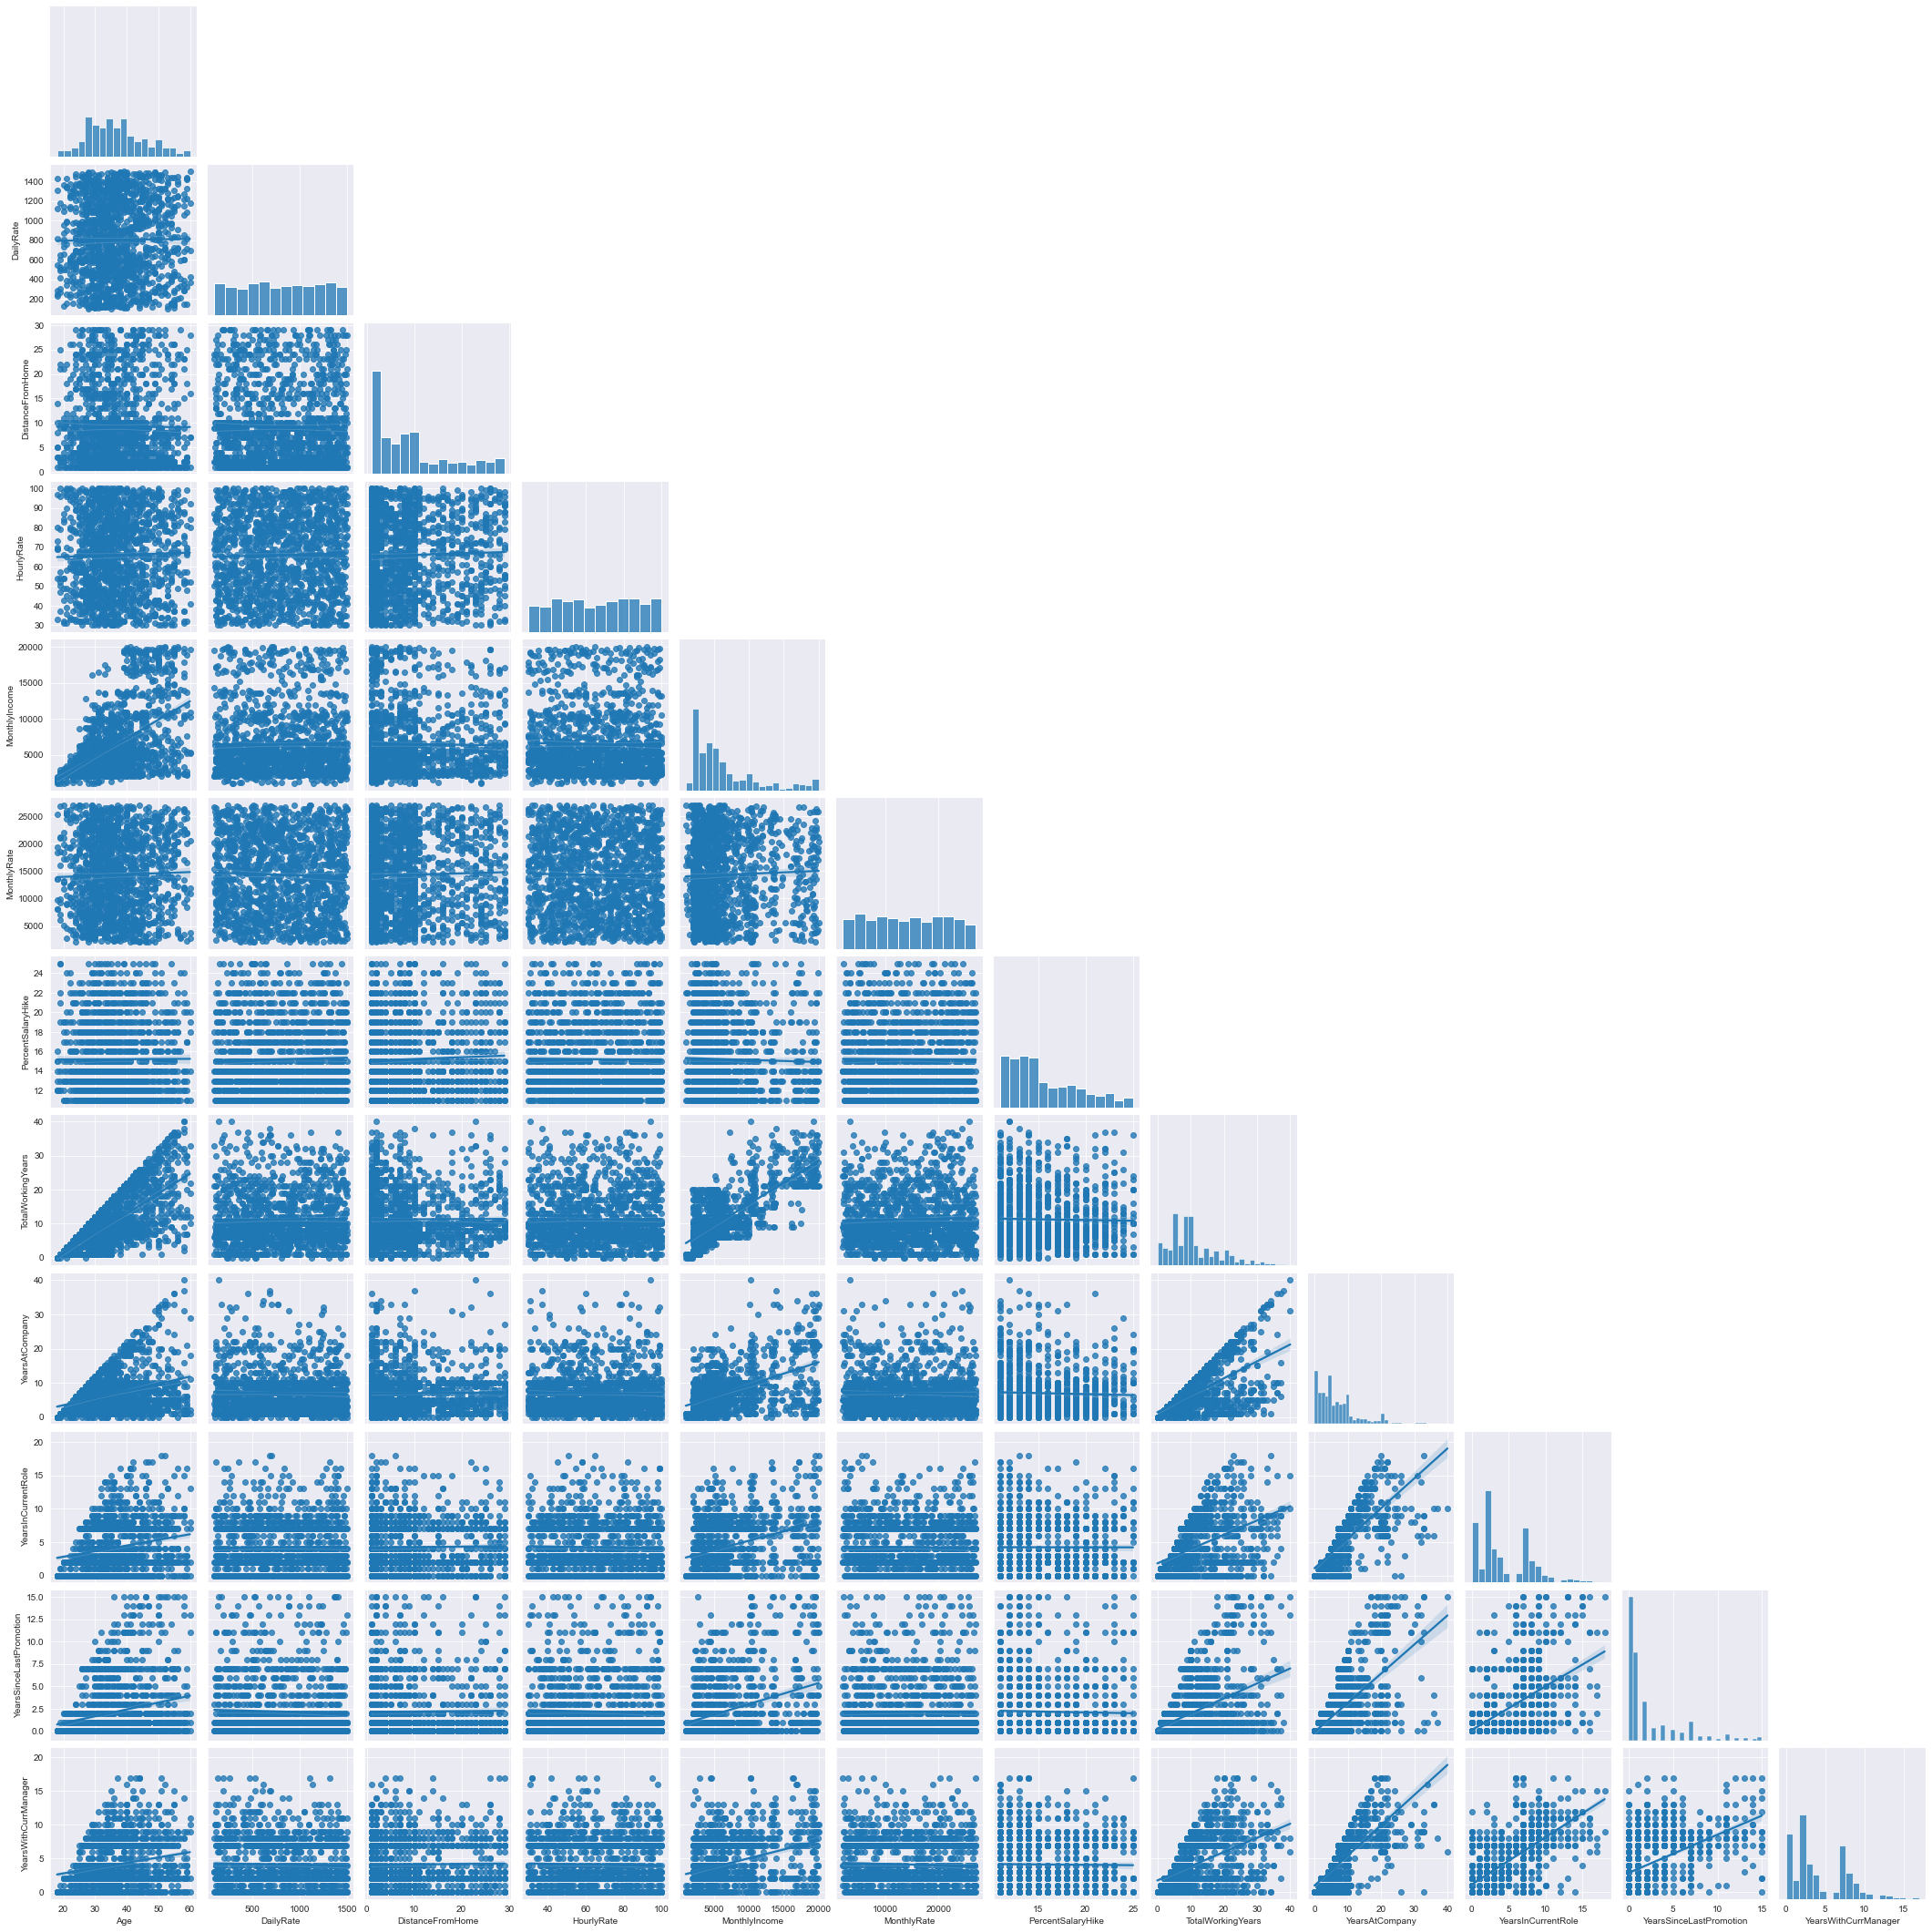

In [34]:
sns.pairplot(datam_num, kind='reg', corner=True);

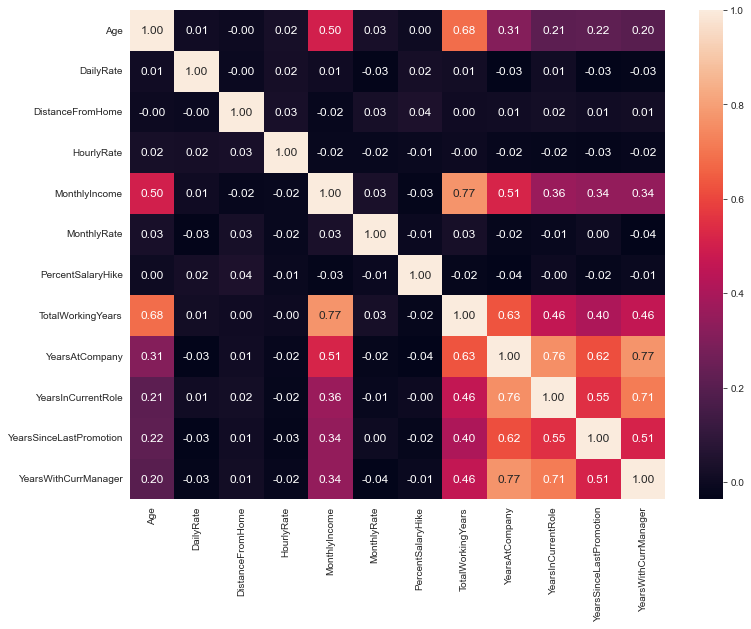

In [36]:
plt.figure(figsize=(12,9))
sns.heatmap(datam_num.corr(),annot=True, fmt = ".2f", annot_kws={'size':12});
plt.show()

Heat map showing  that there are some independant features which shows multicollinearity with each other.

 
Attrition count based on Age


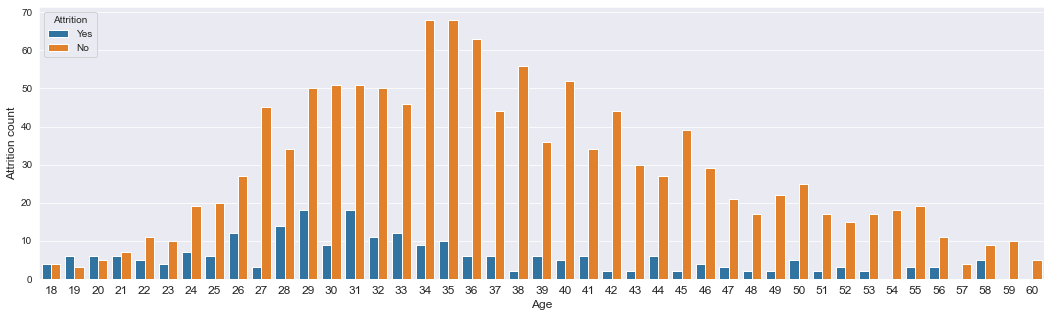

In [37]:
plt.figure(figsize=(18,5))
print(' ')
print('Attrition count based on Age')
sns.countplot(x='Age', hue='Attrition',data=datam)
plt.xticks(fontsize = 12, rotation=0)
plt.ylabel(ylabel = 'Attrition count', fontsize = 12)
plt.xlabel(xlabel = 'Age', fontsize = 12)
plt.show()

In [49]:
datam.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [50]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [51]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [52]:
data2 = datam.copy()

In [53]:
data2['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [54]:
ord_enc = OrdinalEncoder()

ord_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in ord_cols:
    data2[col] = ord_enc.fit_transform(pd.DataFrame(data2[col]))
                                       
                                       
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2.0,1102,2.0,1,2,1.0,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,1.0,279,1.0,8,1,1.0,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2.0,1373,1.0,2,2,4.0,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1.0,1392,1.0,3,4,1.0,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,2.0,591,1.0,2,1,3.0,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [55]:
attr_dict = {'Yes' :1, 'No':0}
gender_dict = {'Male':1, 'Female':0}
overtime_dict = {'Yes':1, 'No':0}

data2['Attrition'] = data2['Attrition'].map(attr_dict)
data2['Gender'] = data2['Gender'].map(gender_dict)
data2['OverTime'] = data2['OverTime'].map(overtime_dict)

In [56]:
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1,...,3,4,1,6,3,3,2,2,2,2


In [57]:
data2[cat_cols].dtypes

Attrition                     int64
BusinessTravel              float64
Department                  float64
Education                     int64
EducationField              float64
EnvironmentSatisfaction       int64
Gender                        int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
NumCompaniesWorked            int64
OverTime                      int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
dtype: object

In [58]:
for feat in data2[cat_cols].columns:
    if data2[feat].dtype =='object':
        data2[feat] = data2[feat].astype(float)

In [59]:
data2[cat_cols].dtypes

Attrition                     int64
BusinessTravel              float64
Department                  float64
Education                     int64
EducationField              float64
EnvironmentSatisfaction       int64
Gender                        int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
NumCompaniesWorked            int64
OverTime                      int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
dtype: object

In [60]:
data2.dtypes.value_counts()

int64      26
float64     5
dtype: int64

In [61]:
data2.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

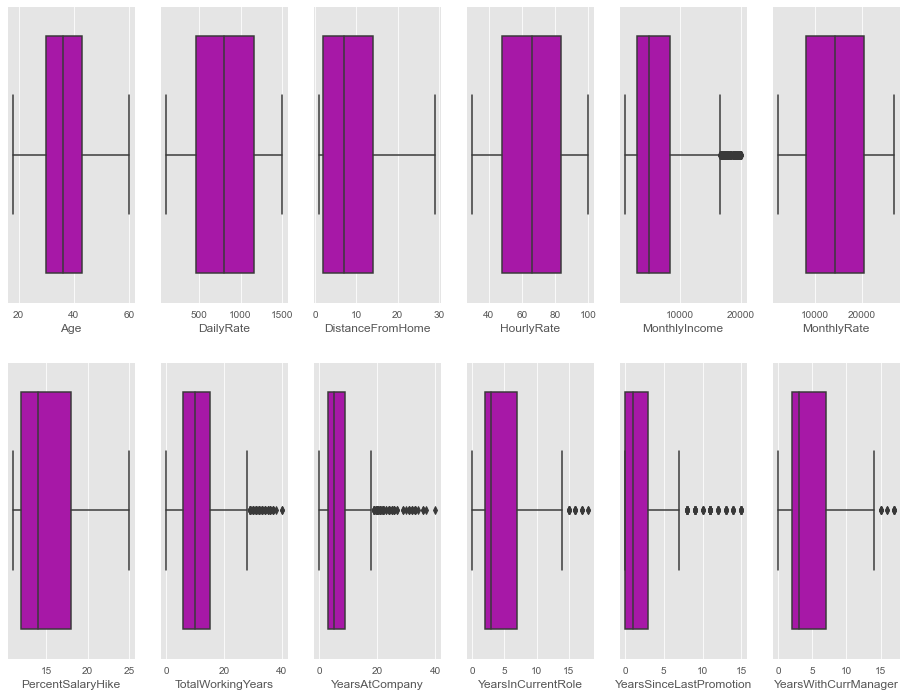

In [63]:
#Checking outliers
plt.figure(figsize=(16,12))
plotnumber=1
for col in num_cols:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.boxplot(data2[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [64]:
from scipy.stats import zscore
z = np.abs(zscore(data2))
threshold = 3
data2_out = data2[(z<3).all(axis = 1)]

print ("Shape of the df before removing outliers: ", data2.shape)
print ("Shape of the df after removing outliers: ", data2_out.shape)
print ("Percentage of data loss post outlier removal: ", (data2.shape[0]-data2_out.shape[0])/data2.shape[0]*100)

Shape of the df before removing outliers:  (1470, 31)
Shape of the df after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


In [65]:
data3 = data2_out.copy()

In [66]:
data3.reset_index(drop=True, inplace=True)
data3[num_cols].skew()

Age                        0.472280
DailyRate                 -0.017078
DistanceFromHome           0.954752
HourlyRate                -0.030481
MonthlyIncome              1.544770
MonthlyRate                0.030596
PercentSalaryHike          0.800592
TotalWorkingYears          1.034487
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

In [67]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data3[num_cols])
x = pt.transform(data3[num_cols])
x = pd.DataFrame(x, columns=data3[num_cols].columns)
x.skew()

Age                       -0.004079
DailyRate                 -0.199742
DistanceFromHome          -0.008149
HourlyRate                -0.105678
MonthlyIncome              0.027700
MonthlyRate               -0.176560
PercentSalaryHike          0.112128
TotalWorkingYears         -0.009666
YearsAtCompany            -0.025230
YearsInCurrentRole        -0.069631
YearsSinceLastPromotion    0.212301
YearsWithCurrManager      -0.070570
dtype: float64

In [68]:
data4 = data3.copy()
data4[num_cols] = x
data4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5.130563,1,2.0,263.356792,2.0,0.698793,2,1.0,2,0,...,3,1,0,3.331995,0,1,2.427596,2.018485,-0.000000,2.260281
1,5.453823,0,1.0,92.505316,1.0,2.254628,1,1.0,3,1,...,4,4,1,3.786692,3,3,3.155981,2.794574,0.566648,2.727090
2,4.949071,1,2.0,311.207318,1.0,1.112840,2,4.0,4,1,...,3,2,0,3.079851,3,3,0.000000,0.000000,-0.000000,0.000000
3,4.750784,0,1.0,314.470917,1.0,1.409000,4,1.0,4,0,...,3,3,0,3.331995,3,3,2.823661,2.794574,0.939888,0.000000
4,4.413071,0,2.0,163.985240,1.0,1.112840,1,3.0,1,1,...,3,4,1,2.806491,3,3,1.242409,1.280069,0.803607,1.264277


In [69]:
rearenge_cols = data4.columns.to_list()
rearenge_cols.remove('Attrition')
rearenge_cols.append('Attrition')
data5 = data4[rearenge_cols]

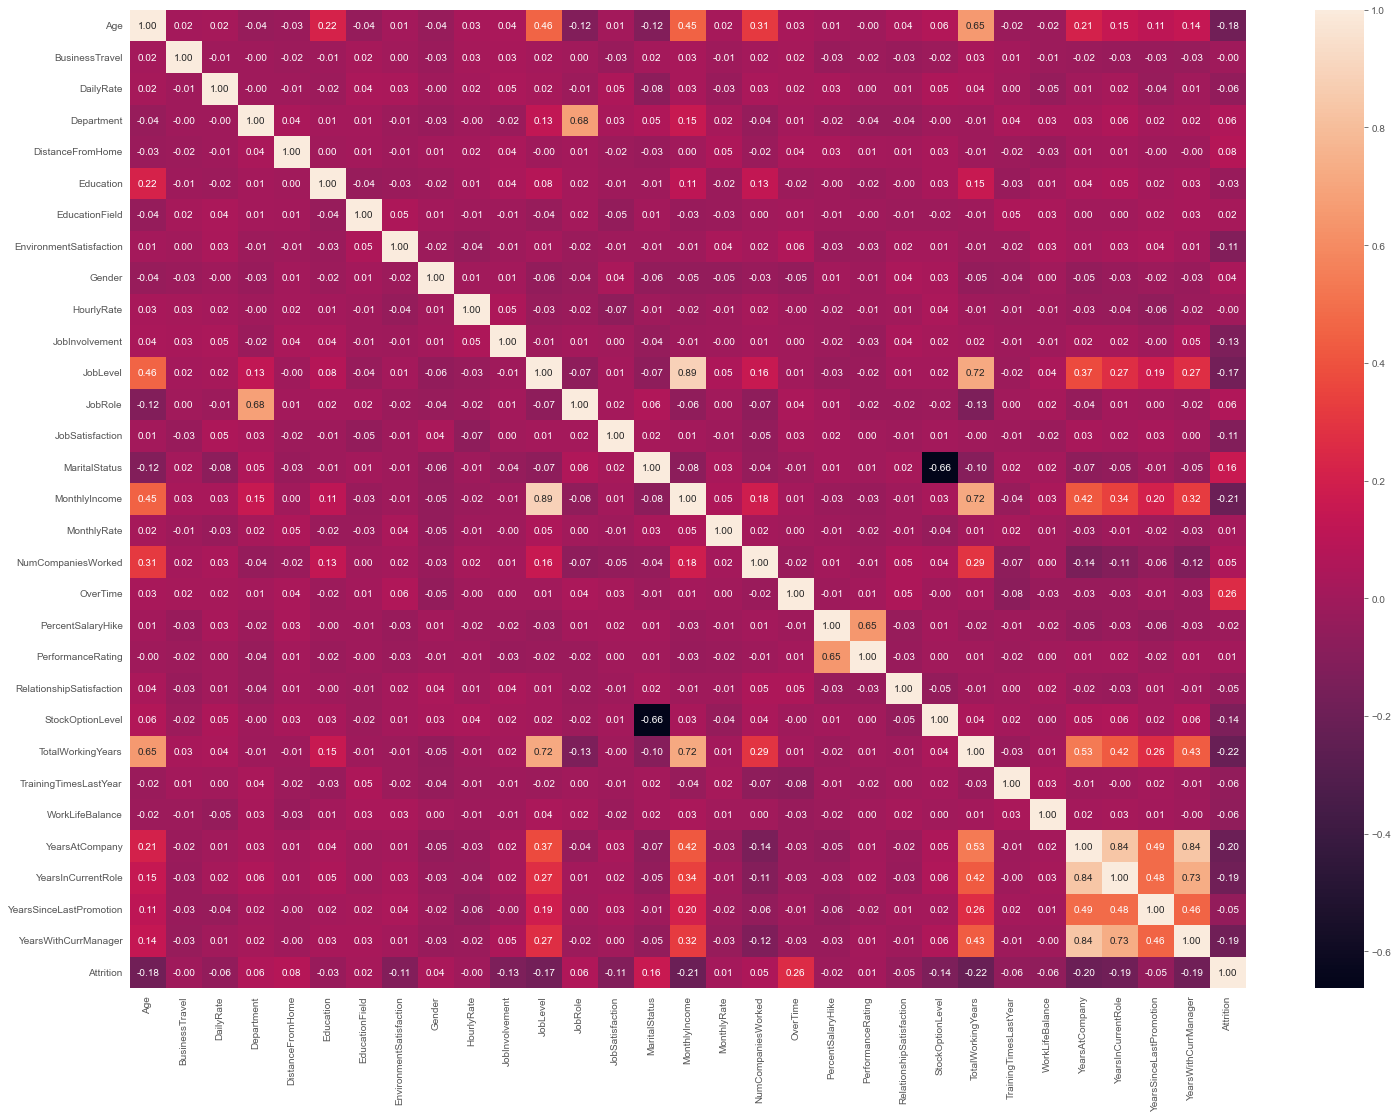

In [70]:
#Correlation & Multicollinearity
plt.figure(figsize=(25,18))
sns.heatmap(data5.corr(),annot=True, fmt = ".2f", annot_kws={'size':10});
plt.show()

In [71]:
scaler= StandardScaler()
df_feat = pd.DataFrame(scaler.fit_transform(data5.drop('Attrition', axis=1)), columns = data5.drop('Attrition', axis=1).columns)
df_tgt = data5['Attrition']

In [72]:
vif = pd.DataFrame()
vif["variables"] = df_feat.columns
vif["VIF"] = [variance_inflation_factor(df_feat.values, i) for i in range(df_feat.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
26,YearsAtCompany,6.180215
15,MonthlyIncome,5.351635
11,JobLevel,5.313534
23,TotalWorkingYears,4.105885
27,YearsInCurrentRole,3.551497
29,YearsWithCurrManager,3.448271
3,Department,2.050797
12,JobRole,1.984397
0,Age,1.931223
14,MaritalStatus,1.844709


In [39]:
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
#         print('\n \n Train Classification report \n', classification_report(y_train,y_pred, digits=2))
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, X, y_class, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,X, y_class, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [40]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
# gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors = 2)
lgr = LogisticRegression()
rfc = RandomForestClassifier()
# gbc = GradientBoostingClassifier()

In [73]:
!!pip install imbalanced-learn
import imblearn 
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y_class = oversample.fit_resample(df_feat, df_tgt)

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for DecisionTreeClassifier model..
 
Best Random_state number for splitting the data is:  73
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 88.08%
Confusion Matrix :

[[250  36]
 [ 33 260]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       286
           1       0.88      0.89      0.88       293

    accuracy                           0.88       579
   macro avg       0.88      0.88      0.88       579
weighted avg       0.88      0.88      0.88       579

Cross Validation score at best cv=8 is : 85.97%


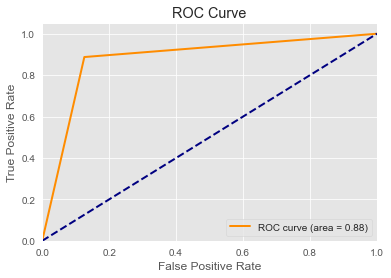

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for ExtraTreesClassifier model..
 
Best Random_state number for splitting the data is:  132
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 97.75%
Confusion Matrix :

[[273   4]
 [  9 293]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       277
           1       0.99      0.97      0.98       302

    accuracy                           0.98       579
   macro avg       0.98      0.98      0.98       579
weighted avg       0.98      0.98      0.98       579

Cross Validation score at best cv=10 is : 97.07%


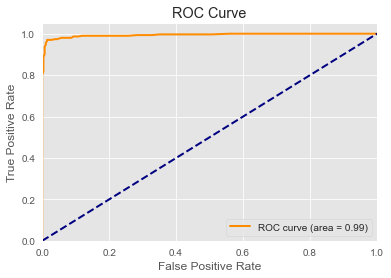

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for KNeighborsClassifier model..
 
Best Random_state number for splitting the data is:  128
 
Accuracy score for Train : 99.88%
Accuracy score for Test : 92.57%
Confusion Matrix :

[[246  40]
 [  3 290]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       286
           1       0.88      0.99      0.93       293

    accuracy                           0.93       579
   macro avg       0.93      0.92      0.93       579
weighted avg       0.93      0.93      0.93       579

Cross Validation score at best cv=10 is : 90.50%


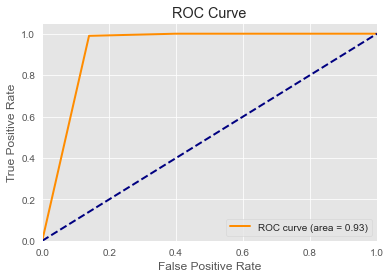

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for LogisticRegression model..
 
Best Random_state number for splitting the data is:  122
 
Accuracy score for Train : 79.79%
Accuracy score for Test : 79.79%
Confusion Matrix :

[[232  66]
 [ 51 230]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       298
           1       0.78      0.82      0.80       281

    accuracy                           0.80       579
   macro avg       0.80      0.80      0.80       579
weighted avg       0.80      0.80      0.80       579

Cross Validation score at best cv=7 is : 79.62%


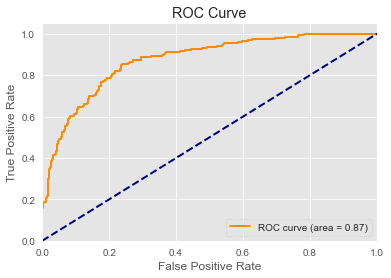

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for RandomForestClassifier model..
 
Best Random_state number for splitting the data is:  29
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 95.51%
Confusion Matrix :

[[281   7]
 [ 19 272]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       288
           1       0.97      0.93      0.95       291

    accuracy                           0.96       579
   macro avg       0.96      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579

Cross Validation score at best cv=11 is : 94.35%


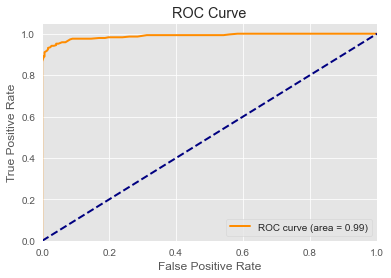

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
3,LogisticRegression,122,79.79,79.79,0.17,7,79.619021
1,ExtraTreesClassifier,132,100.00,97.75,0.43,10,97.066167
4,RandomForestClassifier,29,100.00,95.51,0.86,11,94.351162
0,DecisionTreeClassifier,73,100.00,88.08,1.42,8,85.972289
2,KNeighborsClassifier,128,99.88,92.57,2.07,10,90.498768


In [74]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,knc,lgr,rfc]
models_name = ['DecisionTreeClassifier','ExtraTreesClassifier','KNeighborsClassifier','LogisticRegression','RandomForestClassifier']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_class, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

In [76]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()

knc = KNeighborsClassifier(n_neighbors = 2)
lgr = LogisticRegression()
rfc = RandomForestClassifier()


::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for DecisionTreeClassifier model..
 
Best Random_state number for splitting the data is:  109
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 87.22%
Confusion Matrix :

[[250  45]
 [ 29 255]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       295
           1       0.85      0.90      0.87       284

    accuracy                           0.87       579
   macro avg       0.87      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579

Cross Validation score at best cv=5 is : 86.45%


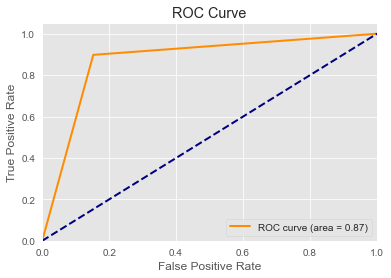

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for ExtraTreesClassifier model..
 
Best Random_state number for splitting the data is:  73
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 97.75%
Confusion Matrix :

[[279   7]
 [  6 287]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       286
           1       0.98      0.98      0.98       293

    accuracy                           0.98       579
   macro avg       0.98      0.98      0.98       579
weighted avg       0.98      0.98      0.98       579

Cross Validation score at best cv=8 is : 97.02%


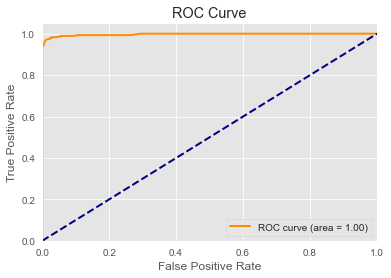

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for KNeighborsClassifier model..
 
Best Random_state number for splitting the data is:  128
 
Accuracy score for Train : 99.88%
Accuracy score for Test : 92.57%
Confusion Matrix :

[[246  40]
 [  3 290]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       286
           1       0.88      0.99      0.93       293

    accuracy                           0.93       579
   macro avg       0.93      0.92      0.93       579
weighted avg       0.93      0.93      0.93       579

Cross Validation score at best cv=10 is : 90.50%


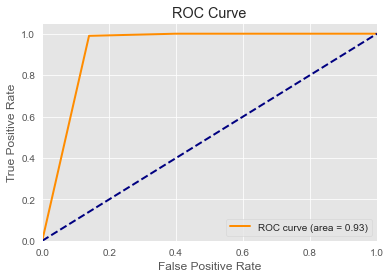

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for LogisticRegression model..
 
Best Random_state number for splitting the data is:  122
 
Accuracy score for Train : 79.79%
Accuracy score for Test : 79.79%
Confusion Matrix :

[[232  66]
 [ 51 230]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       298
           1       0.78      0.82      0.80       281

    accuracy                           0.80       579
   macro avg       0.80      0.80      0.80       579
weighted avg       0.80      0.80      0.80       579

Cross Validation score at best cv=7 is : 79.62%


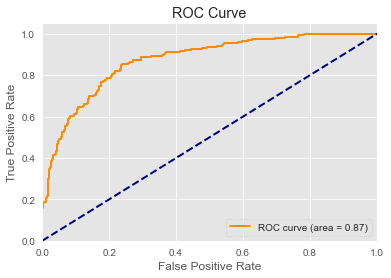

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for RandomForestClassifier model..
 
Best Random_state number for splitting the data is:  83
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 95.85%
Confusion Matrix :

[[296   6]
 [ 18 259]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       302
           1       0.98      0.94      0.96       277

    accuracy                           0.96       579
   macro avg       0.96      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579

Cross Validation score at best cv=9 is : 94.57%


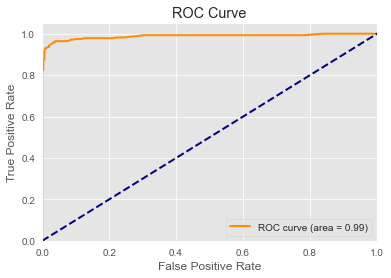

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
3,LogisticRegression,122,79.79,79.79,0.17,7,79.619021
0,DecisionTreeClassifier,109,100.00,87.22,0.43,5,86.448388
1,ExtraTreesClassifier,73,100.00,97.75,0.51,8,97.022432
4,RandomForestClassifier,83,100.00,95.85,1.15,9,94.568449
2,KNeighborsClassifier,128,99.88,92.57,2.07,10,90.498768


In [77]:
algo = []
rs = []
cv_fold = []

train_accuracy = [] 


test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,knc,lgr,rfc]
models_name = ['DecisionTreeClassifier','ExtraTreesClassifier','KNeighborsClassifier','LogisticRegression','RandomForestClassifier']
dummy_count = 0 
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_class, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)

    dummy_count+=1


table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

In [78]:
#Hyper paramter tuning using GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = 45)
ExtraTreesClassifier()

ExtraTreesClassifier()

In [79]:
param_grid_etc = {'n_estimators':[100,150,200, 250,300],
                  'criterion':["gini", "entropy"],
                  'max_depth':[2, 5, 8, 10],
                  'min_samples_split':[2, 5, 8, 12],
                  'min_samples_leaf':[1, 2, 3, 4, 5]
                 }

In [80]:
etc_tune = ExtraTreesClassifier()

In [81]:
etc_grid = GridSearchCV(estimator = etc_tune,
                       param_grid = param_grid_etc,
                       cv = 9,
                       verbose = 1,
                       scoring = 'accuracy')

In [84]:
etc_final = ExtraTreesClassifier(criterion='gini',
                                 max_depth=10,
                                 min_samples_leaf=1,
                                 min_samples_split=2,
                                 n_estimators= 100)

In [85]:
etc_final.fit(x_train,y_train)
y_pred=etc_final.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.9360967184801382


Confusion Matrix :

[[271  25]
 [ 12 271]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       296
           1       0.92      0.96      0.94       283

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579



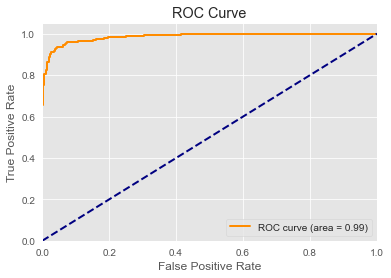

In [86]:
confusion_matrix_c(y_test, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))

cv_score = cross_val_score(etc_final,X, y_class, cv=9, scoring="accuracy").mean()
# print(f"Cross Validation score at best cv = 9 is : {cv_score*100:.2f}%")
y_predict_probabilities = etc_final.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

In [87]:
#Model Saving
filename='HR_Attrition.pkl'
pickle.dump(etc_final,open(filename,'wb'))

In [88]:
model =pickle.load(open('HR_Attrition.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
574,1,1
575,0,0
576,1,1
577,1,1
